# Support Vector Machine implementation from scratch Python

Main purpose of SVM is to draw a hyperplane between different classes to classify different points. Number of features determine the dimension of Hyperplane. i.e. Hyperplane is two dimensional when features are three. When number of features increase then it becomes hard to picturize when number of features increase than 3. It might be possible to find many hyperplanes for same classification task but the best hyperplane is that which has maximum margin to data points of classes.

IN SVM, we take the output of a linear function. If that output is greater than one, we identify it with one class otherwise it belongs to another class. Therefore, range of values in case of SVM is [-1,1] which acts as a margin layer.

Since hyperplane with maximum margin to data points is best, therefore it is tried to maximize. Loss Function which helps in maximizing the margin is Hinge Loss which is presented below. It is also called the Cost Function.

\begin{equation*}
c(x,y,f(x)) = 0\;\;\;\;\;\;\;\;\;\;if\;\;\;\;\;\;\;\;\;\;y*f(x)>=1
\end{equation*}

\begin{equation*}
c(x,y,f(x)) = 1-y*f(x)\;\;\;\;\;\;\;\;\;\;else
\end{equation*}

If predicted and actual value are same, it means there is no misclassification (model correctly predicts the class of data points). Therefore the cost is 0. In this case, Gradient must be updated from Regularization Parameter.

\begin{equation*}
w = w - alpha(2 * lambda * w)
\end{equation*}

When there is misclassification, predicted and actual value will be different. In this case, Gradient will be upgraded by including Loss along with Regularization Parameter.

\begin{equation*}
w = w + alpha(y_i*x_i -2 * lambda * w)
\end{equation*}

##### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

##### Read CSV File containing training data

In [2]:
data = pd.read_csv(r'E:\Masters\01-Study\Master Thesis\1-Working\3rd Task (Laptop C implementation)\3-SVM_scratch_Python\Tutorial-3 (working)\iris.csv')
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


##### Data Pre-processing

Target is the final type of Iris.

In [3]:
target = data['Species']

In order to reduce the complexity of problem, last class 'Iris-Virginica is being dropped.' This way, we have just Binary Classification Problem.

In [4]:
rows = list(range(100,150))
data = data.drop(data.index[rows])

There are four features available in CSV File for Training which are 'Sepal Length', 'Sepal Width', 'Petal Length' and 'Petal Width'. In order to reduce complexity of the problem, only two features have been selected which will be used further for Training and Testing. These features are 'Sepal Length' and 'Petal Length'.

In [5]:
sepal_length = data['SepalLengthCm']
petal_length = data['PetalLengthCm']

Due to dropping the last 50 rows, we have just 100 samples now which belong to 'Iris-Setosa' and 'Iris-Versicolor'.

In [6]:
sepal_length.shape
petal_length.shape

(100,)

First 50 samples belong to Iris Setosa.

In [7]:
setosa_sepal_length = sepal_length[:50]
setosa_petal_length = petal_length[:50]

Last 50 samples belong to Iris-Versicolor.

In [8]:
versicolor_sepal_length = sepal_length[50:]
versicolor_petal_length = petal_length[50:]

Drawing Scatter Plot of Sepal Length and Petal Length of Iris-Setosa and Iris-Versicolor.

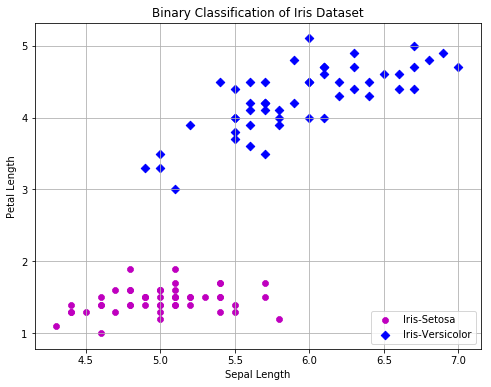

In [9]:
plt.figure(figsize=(8,6))
plt.scatter(setosa_sepal_length, setosa_petal_length, marker='8', color='m', label='Iris-Setosa')
plt.scatter(versicolor_sepal_length, versicolor_petal_length, marker='D', color='b', label='Iris-Versicolor')
plt.title('Binary Classification of Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.grid()
leg = plt.legend(loc='lower right');
plt.show()

In the above plot, magenta octagons represent Iris-Setos whereas blue diamonds represent Iris-Versicolor. From plot, it is apparent that two types can easily be classified by a Linear Line. Purpose of SVM is to draw the best possible Hyperplane between these two classes.

In the following line, unnecessary data is dropped off because it will not be used.

In [10]:
data = data.drop(['Id','SepalWidthCm','PetalWidthCm'],axis=1)

Now Dataset looks as follow:

In [11]:
data.head()

,SepalLengthCm,PetalLengthCm,Species
0,5.1,1.4,Iris-setosa
1,4.9,1.4,Iris-setosa
2,4.7,1.3,Iris-setosa
3,4.6,1.5,Iris-setosa
4,5.0,1.4,Iris-setosa


Drop the last 50 Target Values.

In [12]:
rows = list(range(100,150))
target = target.drop(target.index[rows])

Make a list which has the value -1 if corresponding flower type is Iris-Setosa and value 1 otherwise.

In [13]:
Y = []
for val in target:
    if(val == 'Iris-setosa'):
        Y.append(-1)
    else:
        Y.append(1)

Drop the column 'Species' because it is no longer needed now.

In [14]:
data = data.drop(['Species'],axis=1)

In [15]:
data.head()

,SepalLengthCm,PetalLengthCm
0,5.1,1.4
1,4.9,1.4
2,4.7,1.3
3,4.6,1.5
4,5.0,1.4


Take the value from Pandas Dataframe and convert it to List type so that it could be used further for training and testing.

In [16]:
X = data.values.tolist()

Shuffle the values so that they can be splitted properly among test and train data.

In [17]:
X, Y = shuffle(X,Y)

Split the data into Training and Test Sets. 90% data will be used for Training whereas 10% for Testing.

In [18]:
x_train = []
y_train = []
x_test = []
y_test = []

x_train, x_test, y_train, y_test = train_test_split(X, Y, train_size=0.9, test_size=0.1)

In [19]:
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


Changing the type from List to NumPy Arrays and giving proper shape so that they can be used further.

In [20]:
x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)

y_train = y_train.reshape(90,1)
y_test = y_test.reshape(10,1)

##### Implementation of SVM Classifier

There are two training features, so separating those.

In [21]:
train_feature_1 = x_train[:,0]
train_feature_2 = x_train[:,1]

train_feature_1 = train_feature_1.reshape(90,1)
train_feature_2 = train_feature_2.reshape(90,1)

Initialize the Weigths from Zero.

In [22]:
weights_feature_1 = np.zeros((90,1))
weights_feature_2 = np.zeros((90,1))

Initializing Parameters.

In [23]:
epochs = 1
alpha = 0.0001

###### Training SVM

Weights have been initialized with zero whcih are refined for 1000 epochs.

In [24]:
while(epochs < 10000):
    y = weights_feature_1 * train_feature_1 + weights_feature_2 * train_feature_2
    prod = y * y_train
    #print(epochs)
    count = 0
    for val in prod:
        if(val >= 1):
            cost = 0
            weights_feature_1 = weights_feature_1 - alpha * (2 * 1/epochs * weights_feature_1)
            weights_feature_2 = weights_feature_2 - alpha * (2 * 1/epochs * weights_feature_2)
            
        else:
            cost = 1 - val 
            weights_feature_1 = weights_feature_1 + alpha * (train_feature_1[count] * y_train[count] - 2 * 1/epochs * weights_feature_1)
            weights_feature_2 = weights_feature_2 + alpha * (train_feature_2[count] * y_train[count] - 2 * 1/epochs * weights_feature_2)
        count += 1
    epochs += 1

In [25]:
print(weights_feature_1.shape)
print(weights_feature_2.shape)

(90, 1)
(90, 1)


Clip the Weights because Test Data contains only 10 points.

In [26]:
index = list(range(10,90))
weights_feature_1 = np.delete(weights_feature_1,index)
weights_feature_2 = np.delete(weights_feature_2,index)

In [27]:
print(weights_feature_1.shape)
print(weights_feature_2.shape)

(10,)
(10,)


In [28]:
weights_feature_1 = weights_feature_1.reshape(10,1)
weights_feature_2 = weights_feature_2.reshape(10,1)

Reshaping so that these values can be used further.

In [29]:
print(weights_feature_1.shape)
print(weights_feature_2.shape)

(10, 1)
(10, 1)


Test Data has also two features. So separating the two features.

In [30]:
test_feature_one = x_test[:,0]
test_feature_two = x_test[:,1]

Reshaping to use further.

In [31]:
test_feature_one = test_feature_one.reshape(10,1)
test_feature_two = test_feature_two.reshape(10,1)

##### Testing SVM

In [32]:
y_pred = weights_feature_1 * test_feature_one + weights_feature_2 * test_feature_two

Collecting the predictions into an array.

In [33]:
predictions = []
for val in y_pred:
    if(val > 1):
        predictions.append(1)
    else:
        predictions.append(-1)

##### Checking Test Accuracy

In [34]:
print(accuracy_score(y_test,predictions))

1.0


Accuracy is 100% because data is very simple.

Now this accuracy will be compared with the Cikit-Learn SVM Classifier.

# SVM Classifier from Scikit-Learn

##### Importing Libraries

In [35]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

##### Initiating the Classifier

In [36]:
clf = SVC(kernel='linear')

##### Training SVM

In [37]:
clf.fit(x_train,y_train)

C:\Users\Shoaib\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

##### Testing SVM

In [38]:
y_pred = clf.predict(x_test)

##### Checking Test Accuracy

In [39]:
print(accuracy_score(y_test,y_pred))

1.0


As it can be seen that Accuracy in both the cases is exactly the same.